In [214]:
#Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import scipy.stats as stat

### **Phase 1**: Data Collection and Preparation

#### **Task 1.1**: Data Collection

In [215]:
train_data = r"https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"


In [216]:
# data = pd.read_csv(r"C:\Users\ADMIN\Documents\datasets\datasets\practice\home_loan_train.csv")
data = pd.read_csv(train_data)
df = data.copy()

#### **Task 1.2**: Preliminary Data Analysis

In [217]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


 From the initial view, the following observations were made:
- The Dependents column has non-integer values
- There are missing values in Self Employed, Loan Amount, Loan Amount Term and Credit History columns
- The Applicant Income, Coapplicant Income  and Loan Amount column seem to contain outliers and widely spread figures
- Aapplicant income columns should be converted to float data type

In [218]:
df.tail(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y


From the tail view, it is observed that,
- There are missing values in Dependents, Self Employed, Loan Amount and Credit History columns
- There seems to be wide range of figures in Applicant Income, Coapplicant Income and Loan Amount

In [219]:
# Check the dimension

df.shape

(614, 13)

In [220]:
# See what the dataset is made of
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the information summary displayed above, the following observations were made

- Some columns have missing values
- The dependents data type is objects (should be converted to integer)
- The coapplicant income data type is float(should be converted to integer)


#### **Task 1.3**: Data Cleaning

**What to do based on observation**

1. Check for duplicates
2. Handle missing values
3. Convert data types


In [221]:
# Check for duplicate items
df.duplicated().sum()

np.int64(0)

There are no duplicates in this dataset

In [222]:
# Check for missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

According to the information the following columns have missing values:

- Gender : 13
- Married : 3
- Dependents : 15
- Self-Employed : 32
- Loan Amount : 22
- Loan Amount Term : 14
- Credit History : 50

We will fix each column one after the other.

In [223]:
# To fix missing columns in Gender, I will use the mode

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [224]:
# To fix missing columns in Gender, I will also use the mode, because it is the column contains categorical data

df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

df['Married'].isnull().sum()

np.int64(0)

In [225]:
# Handle the '+' sign in the Dependents column 
df['Dependents'] = df['Dependents'].replace('3+', 3)


In [226]:
# Deal with the missing value
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [227]:
# Convert it to integer
df['Dependents'] = df['Dependents'].astype('int8')
df['Dependents'].isna().sum()


np.int64(0)

In [228]:
df['Dependents'].dtypes

dtype('int8')

In [229]:
# For the Self-Employed column, I filled with the mode 

df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Self_Employed'].isna().sum()

np.int64(0)

For the loan amount, since it is not clear how much should be assigned to the applicant, the purpose of the application has been forfeited. Hence, it is safest to drop the missing rows

In [230]:
df.dropna(subset= 'LoanAmount', axis=0, inplace=True)
df['LoanAmount'].isna().sum()

np.int64(0)

Since the number of months for repayment was also not stated for the missing rows in the Loan Amount Term column, it is best to drop them

In [231]:
df.dropna(subset= 'Loan_Amount_Term', axis=0, inplace=True)
df['Loan_Amount_Term'].isna().sum()

np.int64(0)

For the Credit History column, I have decided to fill the missing values values with zero as indicated in the documentation of this dataset

In [232]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Credit_History'].isna().sum()

np.int64(0)

In [233]:
#  Check the dataset again to confirm if there are any missing values
print(df.isna().sum())

print('\nThere are no more missing values in this dataset.')

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no more missing values in this dataset.


In [234]:
# Convert the Coapplicant Income column to float
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype('float64')

In [235]:
# To observe the outliers, I will separate the numerical columns from the categorical columns

num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [236]:


def outliers(df, column, i):
    plt.subplot(2, 3, i)
    sns.boxplot(df[column], color='violet')
    plt.title(f'\n Boxplot Showing {column}')
    

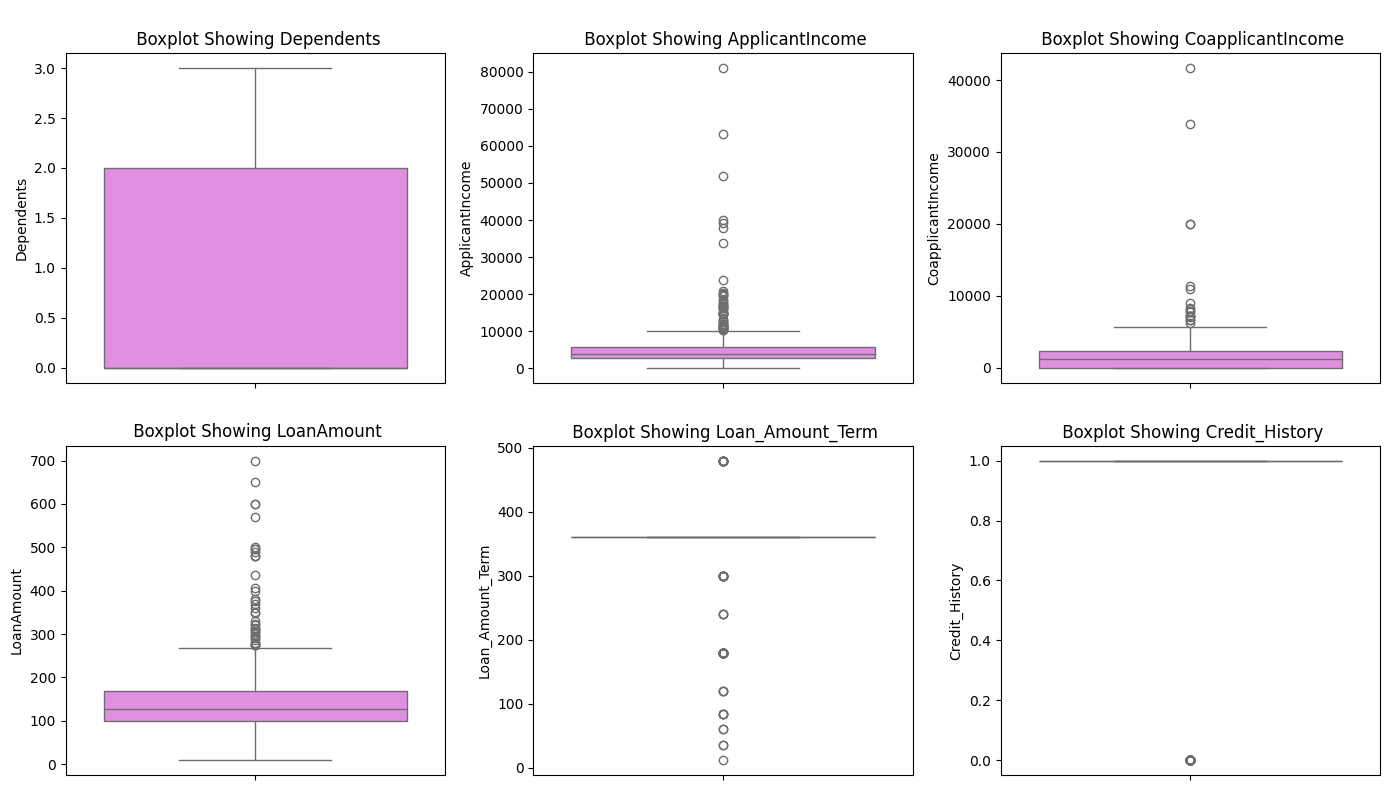

In [237]:
plt.figure(figsize= (14, 8))
for i, col in enumerate(num_cols, start=1):
    outliers(df, col, i)
plt.tight_layout()
plt.show()

 From the boxplot ation above, there are possible outliers in the Applicant Term, Coapplicant Term, Loan_Amount

 I recommend capping or winsorizing or totally removing the outliers (if advised by the domain expert)


In [238]:
# To address the outliers


### **Phase 2**: Exploratory Data Analysis

#### **Task 2.1**: Descriptive Statistics

In [239]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,578,578,578,578.000000,578,578,578.000000,578.000000,578.000000,578.000000,578.000000,578,578
unique,578,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,472,377,NaN,457,501,NaN,NaN,NaN,NaN,NaN,225,403
mean,NaN,NaN,NaN,0.756055,NaN,NaN,5435.138408,1640.482561,147.143599,342.145329,0.863322,NaN,NaN
std,NaN,NaN,NaN,1.011720,NaN,NaN,6229.382997,2993.270767,86.342523,65.442101,0.343805,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,2890.250000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,3812.500000,1211.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,2.000000,NaN,NaN,5795.000000,2281.000000,168.000000,360.000000,1.000000,NaN,NaN


From the Descriptive Statistics

|Feature Type|Observation| Implication|
|---------------|-----------------|----|
|Gender|Male applicants are more than female applicants (472:106)| It can affect prediction|
|Married|About 65% of the applicants are married|It possibly correlates with Dependents|
|Dependents|More than half the applicants have at 2 dependents|
|Education|Graduate Applicants are more than Non-Graduates| It can also affect prediction|
|Self_Employed|More than 85% of the applicants are not self-employed|
|ApplicantIncome|The dataset seems skewed, with majority of the values between 150 to 6000.The maximum number is 81,000, indicating a wide spread, and possible outliers| Adjust with log transformation or BoxCox|
|Coapplicant |Wide range of values and possible outliers, indicating possible right-skewedness| Adjust with log transformation or BoxCox|
|Loan Amount and Loan Amount Term| Possible skewness and outliers| Treat with Log transformation|
|Credit History| Imbalanced class(more Nos than Yes)| Apply one-hot encoding during modeling|
|Loan Status|Imbalanced class|It might likely affect prediction. Treat with one-hot encoding|




In [240]:
# Before starting, I will like to make a copy of the dataset

data = df.copy()

#### **Task 2.2**: Univariate Numerical EDA

In [241]:
def univariate_numerical_eda(data, column):
    """This is a Univariate EDA on a single numerical column
    It reveals the statistical summary, skewness, kurtosis, KDE and Boxplot"""

    print('*'*75)
    print('*'*75)
    print(f'\n Feature: {column}')
    
    print(data[column].describe().to_frame())
    print(f'\n Skewness = {data[column].skew():.3f}')
    print(f'Kurtosis = {data[column].kurt():.3f}')
    print('*'*30)

    plt.figure(figsize= (12, 5))


    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins=30, color="#4B0D683A")
    plt.title(f'\n Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column], color="#3A0A793A")
    plt.title(f'\n Boxplot of {column}')

    plt.tight_layout()
    plt.show()


    # Note on Transformation
    if abs(data[column].skew()) > 1:
        print(f'\n {column} is highly skewed. I would consider using log or Box-Cox for transformation')
    elif abs(data[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")
        


***************************************************************************
***************************************************************************

 Feature: Dependents
       Dependents
count  578.000000
mean     0.756055
std      1.011720
min      0.000000
25%      0.000000
50%      0.000000
75%      2.000000
max      3.000000

 Skewness = 0.987
Kurtosis = -0.406
******************************


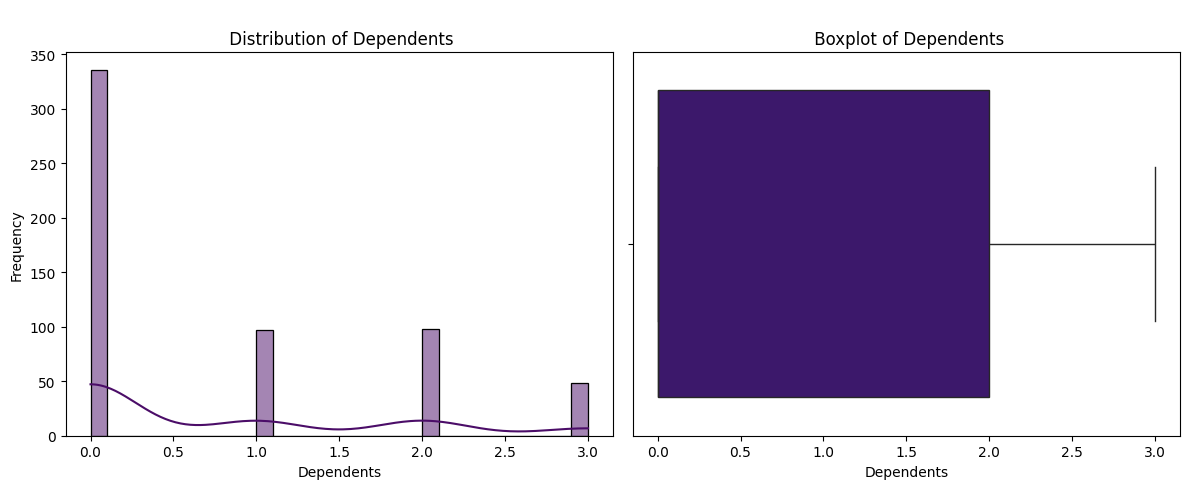

Dependents is moderately skewed.
***************************************************************************
***************************************************************************

 Feature: ApplicantIncome
       ApplicantIncome
count       578.000000
mean       5435.138408
std        6229.382997
min         150.000000
25%        2890.250000
50%        3812.500000
75%        5795.000000
max       81000.000000

 Skewness = 6.511
Kurtosis = 59.271
******************************


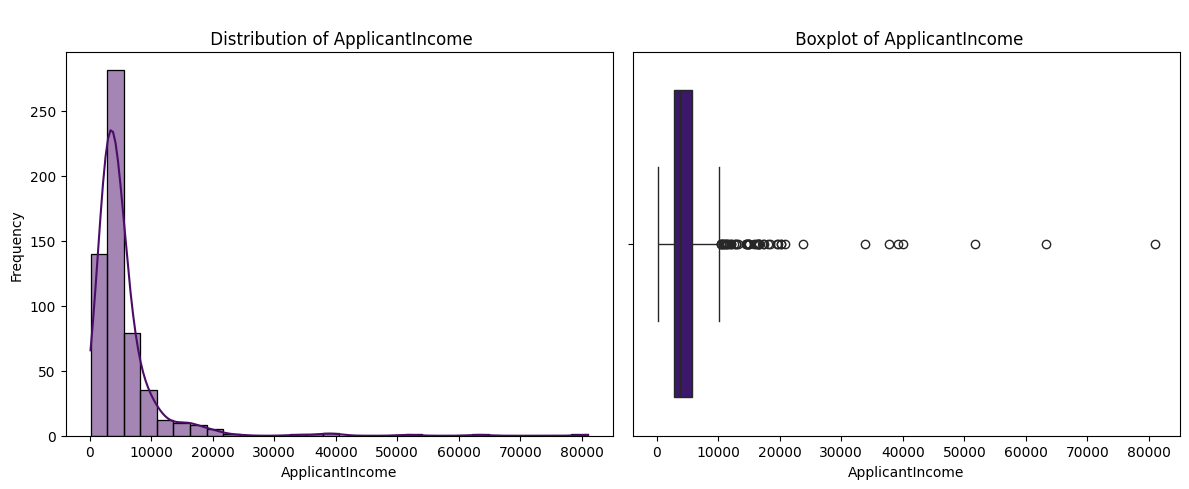


 ApplicantIncome is highly skewed. I would consider using log or Box-Cox for transformation
***************************************************************************
***************************************************************************

 Feature: CoapplicantIncome
       CoapplicantIncome
count         578.000000
mean         1640.482561
std          2993.270767
min             0.000000
25%             0.000000
50%          1211.500000
75%          2281.000000
max         41667.000000

 Skewness = 7.418
Kurtosis = 82.204
******************************


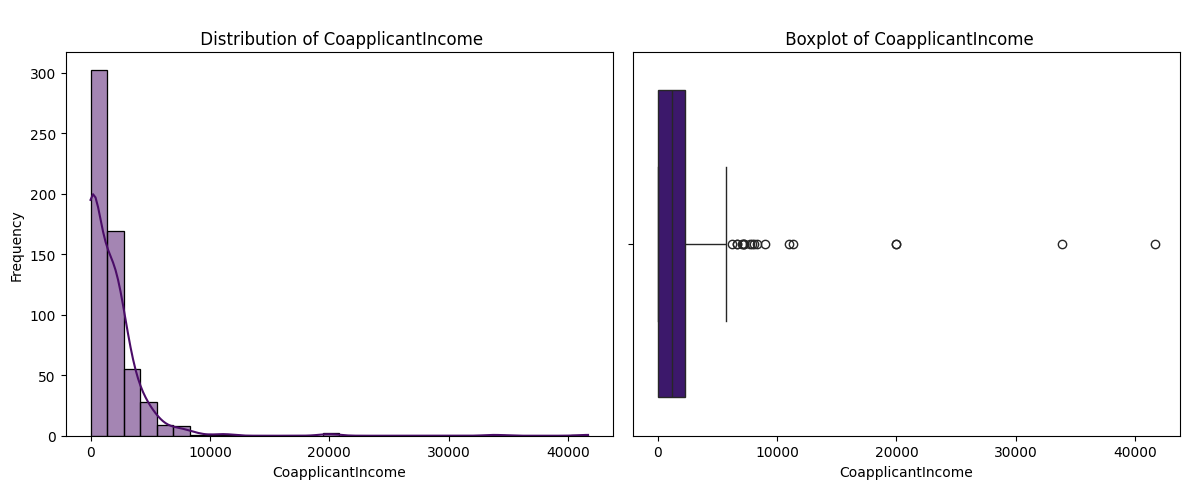


 CoapplicantIncome is highly skewed. I would consider using log or Box-Cox for transformation
***************************************************************************
***************************************************************************

 Feature: LoanAmount
       LoanAmount
count  578.000000
mean   147.143599
std     86.342523
min      9.000000
25%    100.000000
50%    128.000000
75%    168.000000
max    700.000000

 Skewness = 2.650
Kurtosis = 10.162
******************************


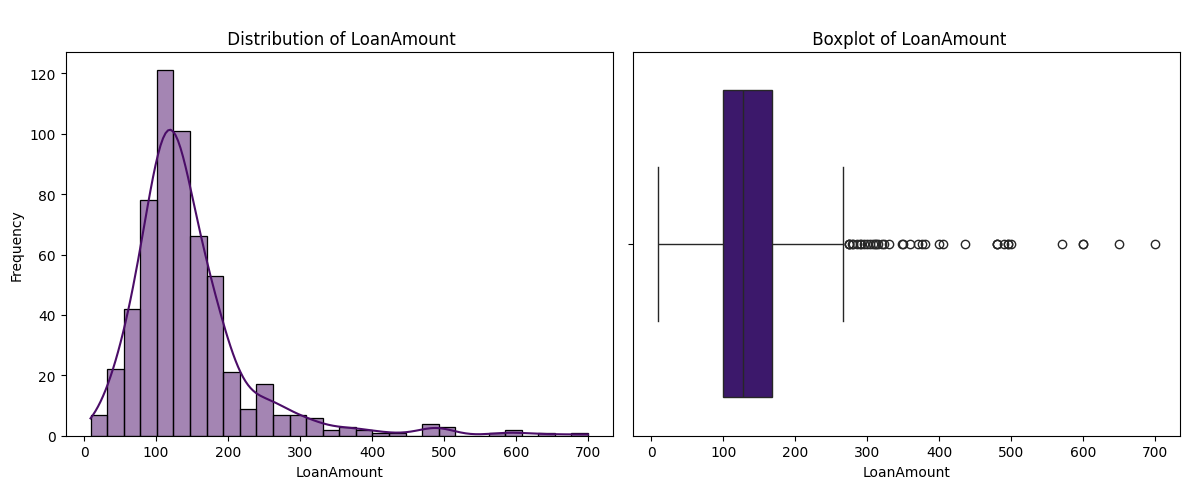


 LoanAmount is highly skewed. I would consider using log or Box-Cox for transformation
***************************************************************************
***************************************************************************

 Feature: Loan_Amount_Term
       Loan_Amount_Term
count        578.000000
mean         342.145329
std           65.442101
min           12.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000

 Skewness = -2.365
Kurtosis = 6.729
******************************


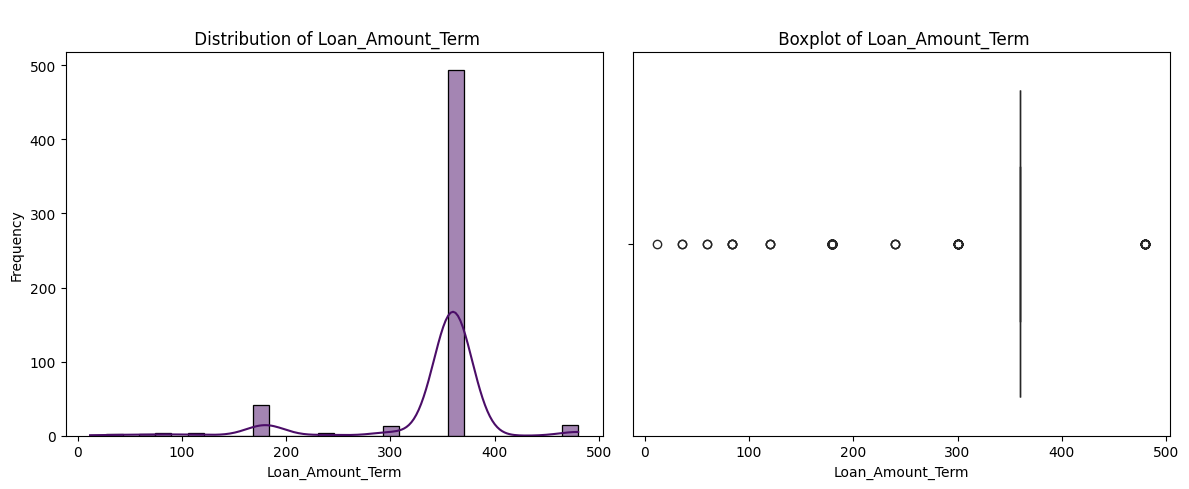


 Loan_Amount_Term is highly skewed. I would consider using log or Box-Cox for transformation
***************************************************************************
***************************************************************************

 Feature: Credit_History
       Credit_History
count      578.000000
mean         0.863322
std          0.343805
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

 Skewness = -2.121
Kurtosis = 2.507
******************************


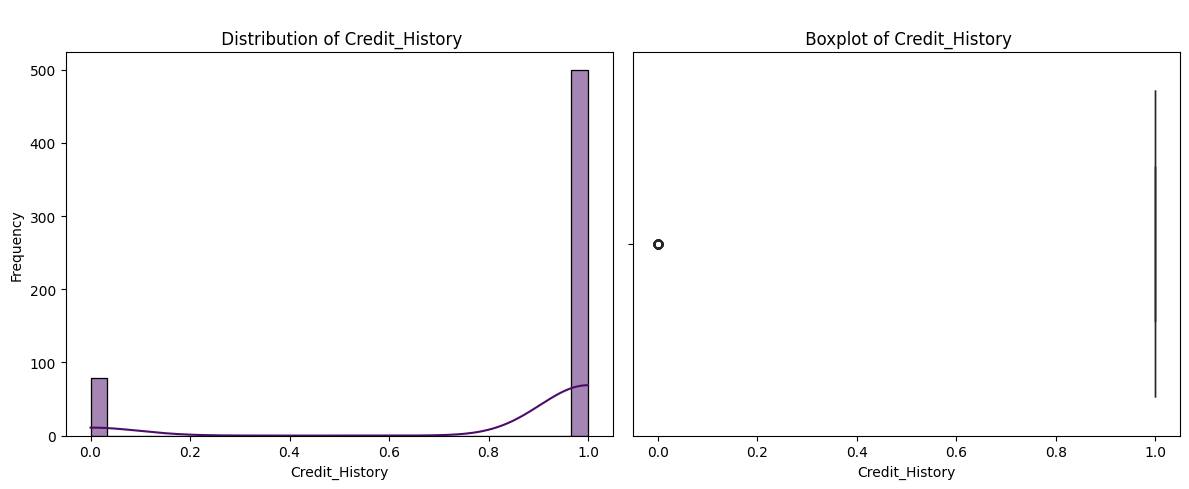


 Credit_History is highly skewed. I would consider using log or Box-Cox for transformation


In [242]:
# Loop all the numerical columns at once
for col in num_cols:
    univariate_numerical_eda(data, col)

In [243]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### **Task 2.3**: Univariate Categorical EDA

In [244]:
#  I will first assign the categorical variables to a variable
cat_cols = data.select_dtypes(include='object').columns
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [245]:
def univariate_categorical_eda(data, column):
    """This performs univariate analysis on categorical or ordinal column.
    It reveals the frequency table, proportion and a countplot """

    print('*'*75)
    print('*'*75)
    print(f'\n Feature: {column}')

    # Visualization
    # Bar chart
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x= data[column].value_counts().index, 
        y= data[column].value_counts().values,
        hue= data[column].value_counts().index,
        legend=False)

    # For pie chart
    plt.subplot(1, 2, 2)
    plt.pie(data[column].value_counts(), autopct='%1.1f%%', startangle=90)
    plt.title(f'\n Pie Chart Distribution of {column}')
    plt.ylabel('')


    plt.tight_layout()
    plt.show()

    # # Annotate each bar with percentage
    # total = len(data[column])
    # for p in ax.patches:
    #     height = p.get_height()
    #     ax.text(p.get_x() + p.get_width()/2, height + 1,
    #     f'{(height/total)*100:.1f}%, ha= 'center')
    

***************************************************************************
***************************************************************************

 Feature: Gender


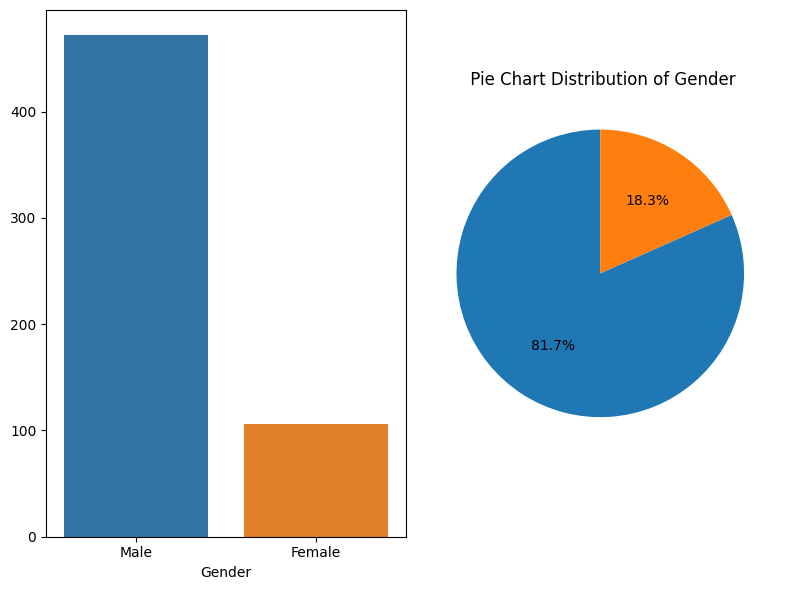

***************************************************************************
***************************************************************************

 Feature: Married


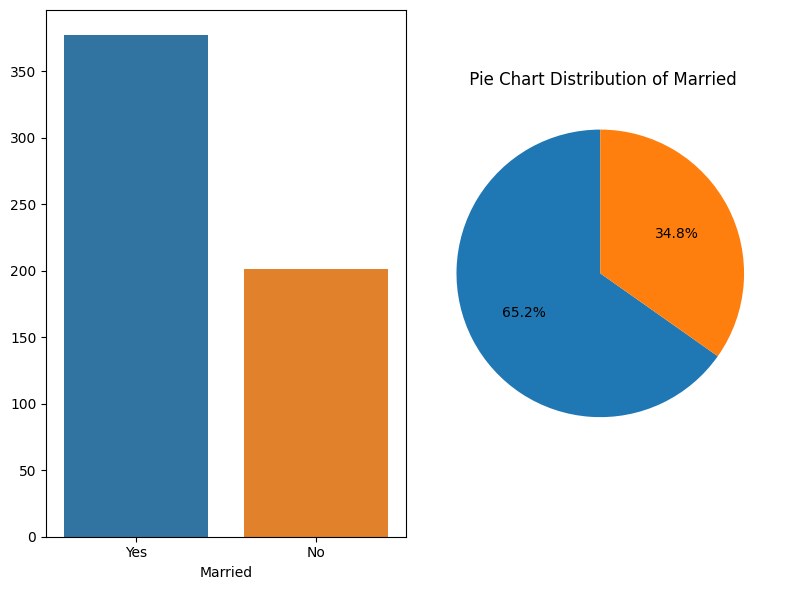

***************************************************************************
***************************************************************************

 Feature: Education


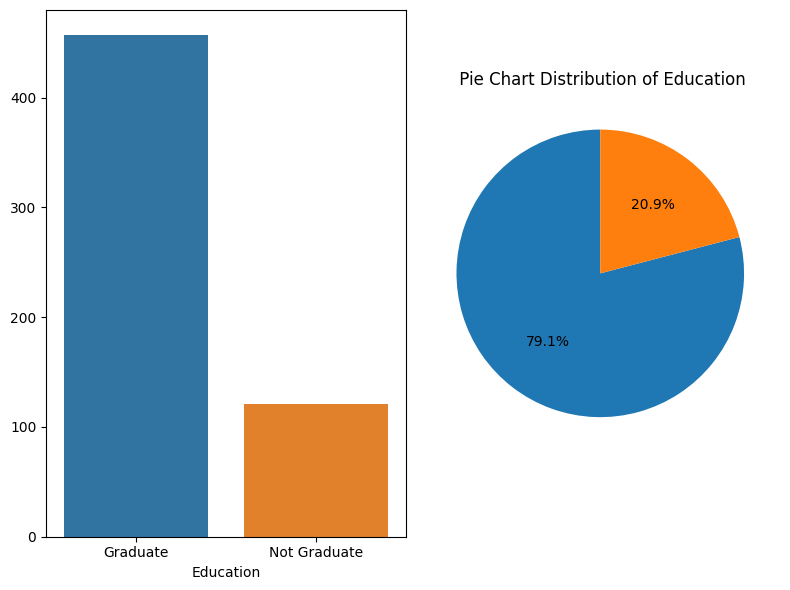

***************************************************************************
***************************************************************************

 Feature: Self_Employed


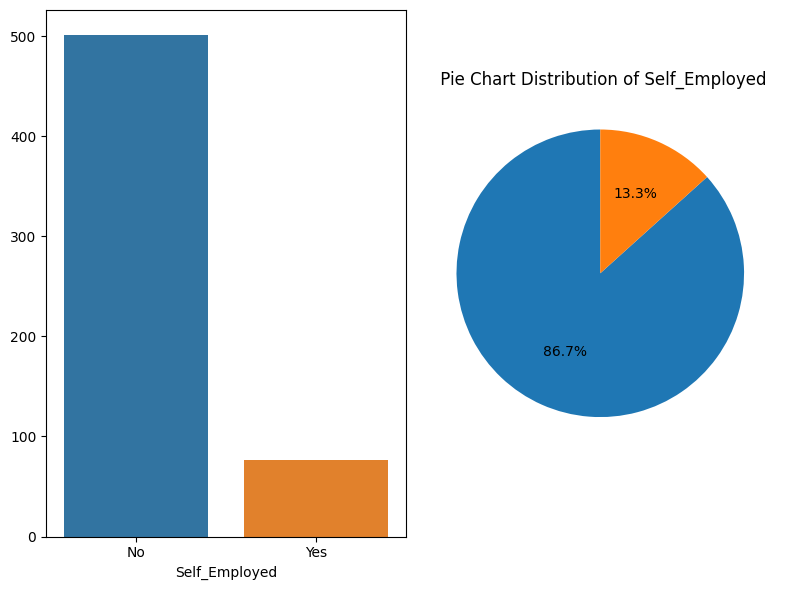

***************************************************************************
***************************************************************************

 Feature: Property_Area


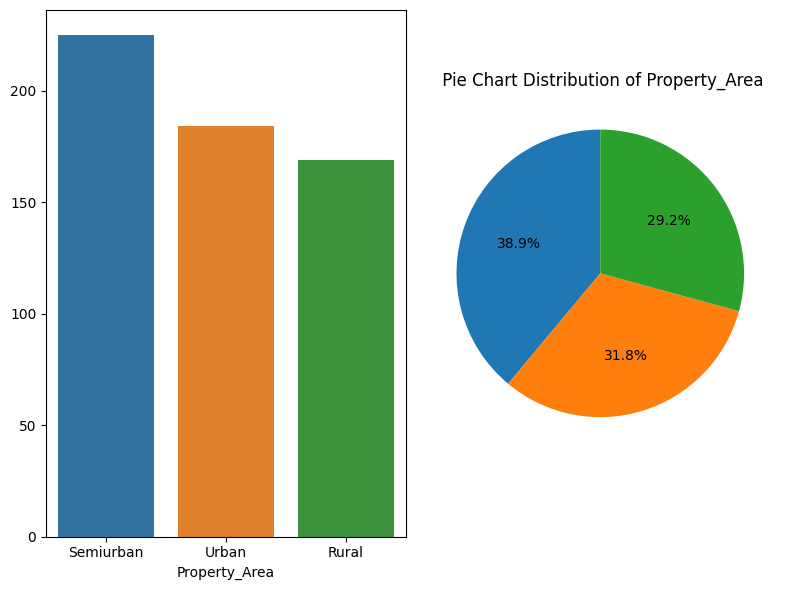

***************************************************************************
***************************************************************************

 Feature: Loan_Status


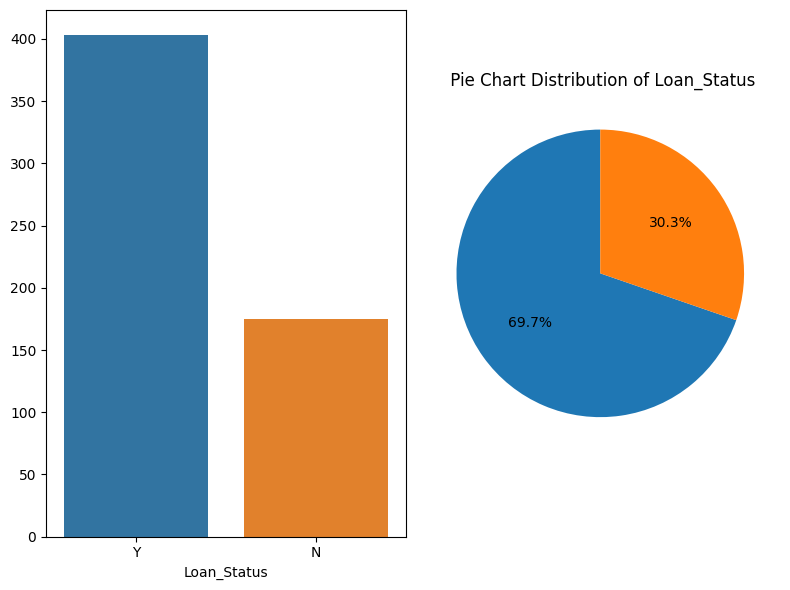

In [246]:
for col in cat_cols:
    if col != 'Loan_ID':
        univariate_categorical_eda(data, col)

#### **Task 2.4**: Bivariate Analysis

In [247]:
data['Loan_Status'] = data['Loan_Status'].apply(lambda x: 0 if x== 'N' else 1)
data['Loan_Status'].head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [248]:
def correlation_with_target(data, target_col, figsize=(10, 2)):
    # For numeric columns only
    numeric_df = data.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column {target_col} must be numeric and present in the dataset")
    # compute the correlation of all the numeric columns with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corr_df = corrs.to_frame(name='corr').T

    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_df,
        annot=True,
        fmt='.3f',
        cmap='Blues',
        center=0,
        vmin= -1,
        vmax= 1,
        cbar_kws= {'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha= 'right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}')
    plt.tight_layout()
    plt.show()

    # Return sorted sorted correlations for further use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

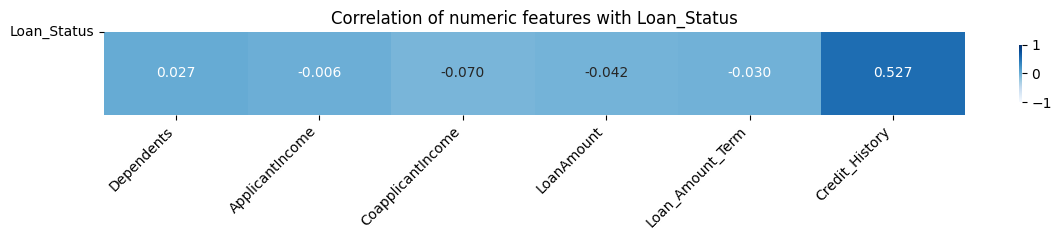

Credit_History       0.527071
CoapplicantIncome   -0.070154
LoanAmount          -0.041898
Loan_Amount_Term    -0.029979
Dependents           0.027230
ApplicantIncome     -0.005665
dtype: float64


In [249]:
corr_series = correlation_with_target(data, 'Loan_Status', figsize=(12,2.5))
print(corr_series)

| Feature                  | Correlation | Interpretation                                                                                      |
| ------------------------ | ----------- | --------------------------------------------------------------------------------------------------- |
| **Credit History**              | +0.527       | Strongest positive — higher credit history → more possibility for a positive loan status. Likely a key predictive feature.              |
| **Coapplicant Income**     | −0.701      | Strong negative —  Very important feature. |
| **LoanAmount**            | -0.041       | Weak Negative —  Slightly contributes to loan status decision. Helpful but secondary predictor.            |
| **Loan_Amount_Term**          | -0.030       | Slightly negative — may affect loan application     |
| **Dependents** | +0.027       | Slightly positive.                                                             |
| **Applicant Income**              | −0.005       | Weakest negative. Minimal linear relationship

**How does this help our model**

| Action                                                     | Explanation                                                                                              |
| ---------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- |
| **Keep credit history, Dependents, coapplicant income, and Loan_Amount_TermStrong predictors. You’ll definitely include them.                                                       |
| **Be cautious with Loan Amount and Dependents**        | Moderate effect; consider non-linear relationships or transformations.                                   |
| **Applicant Income**                               | Probably drop unless domain reasoning suggests otherwise.                                                |
| **Interactions to test:**                                  | `Applicant Income + Coapplicant Income`(Total Income), `Loan Amount  / Loan Amount Term` (Estimated Monthly Installments(EMI)), and `Loan Amount / Total Income` — may capture subtle combined effects. |


In [267]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(data, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """
     # Calculate the correlation coefficient
    corr, p_value = pearsonr(data[x_col], data[y_col])

     # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=data, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

     # Title Labels
    plt.title(f"{y_col} vs {x_col}\n Correlation: {corr:.3f} (p={p_value:.3f})", fontsize=12)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(alpha=0.3)
    plt.show()



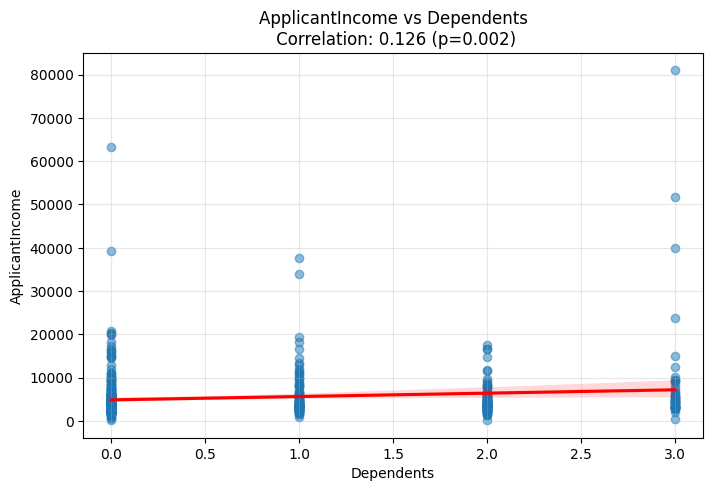

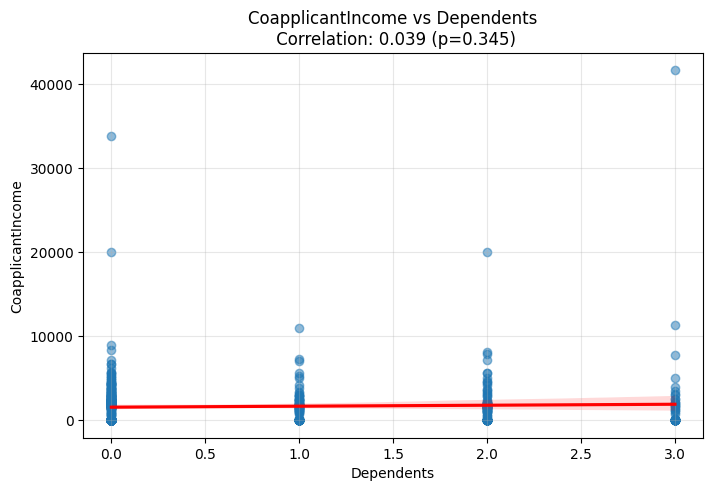

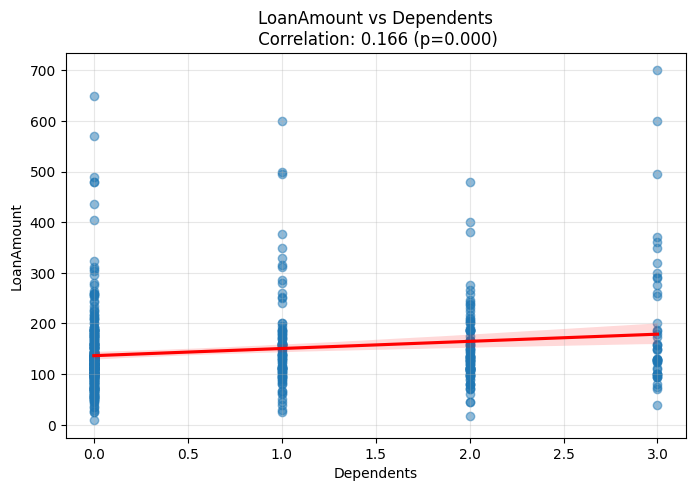

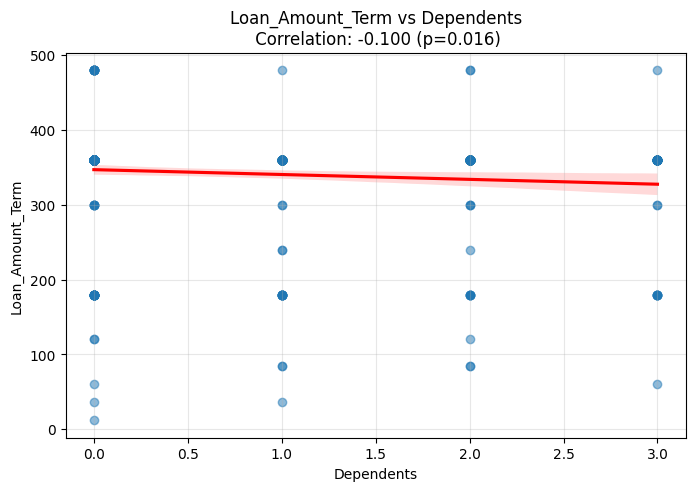

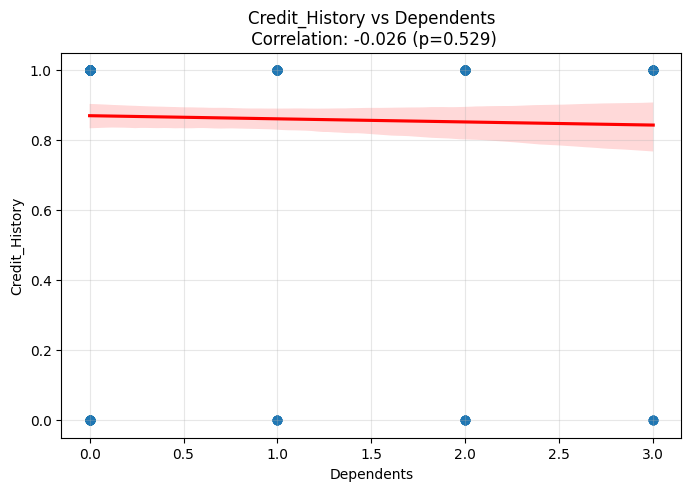

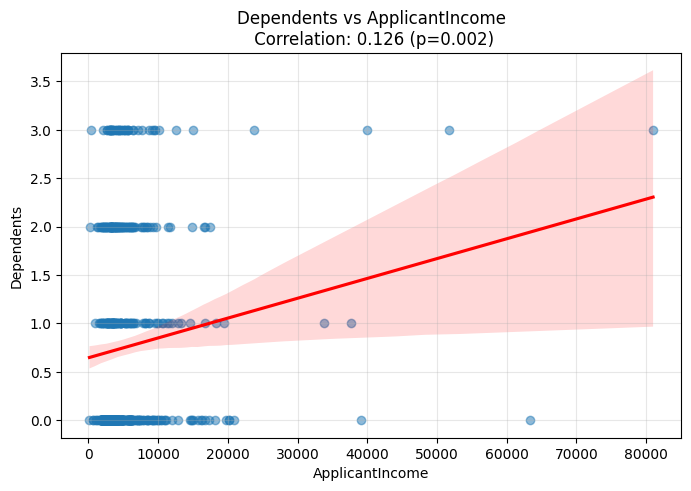

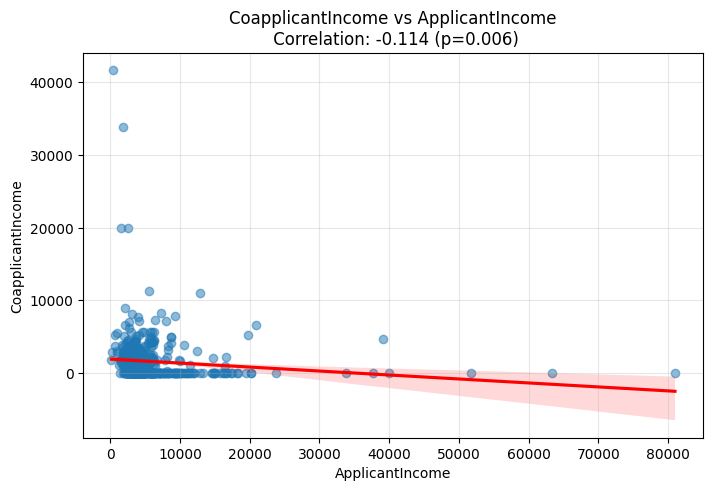

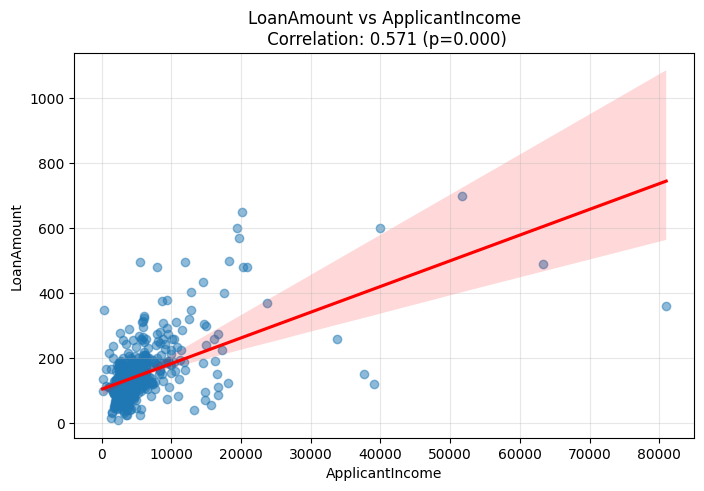

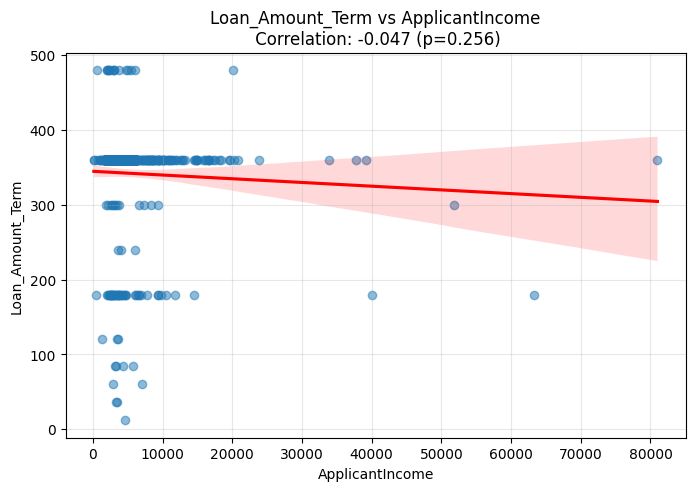

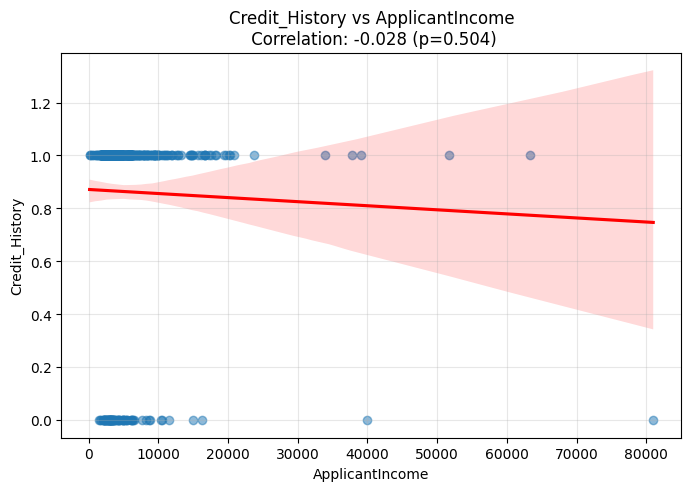

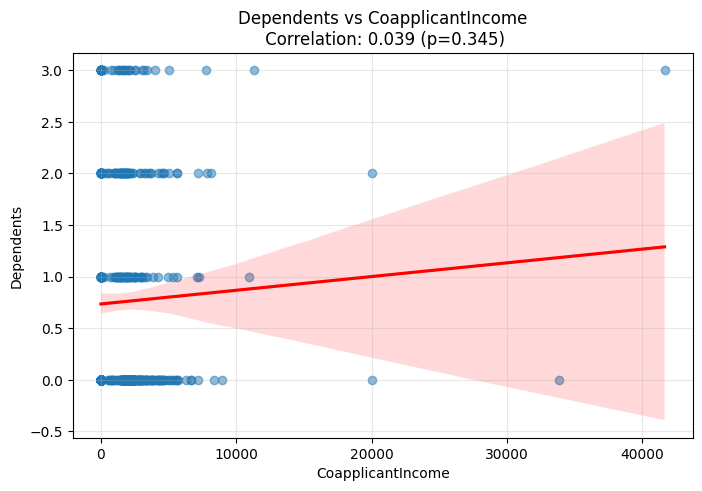

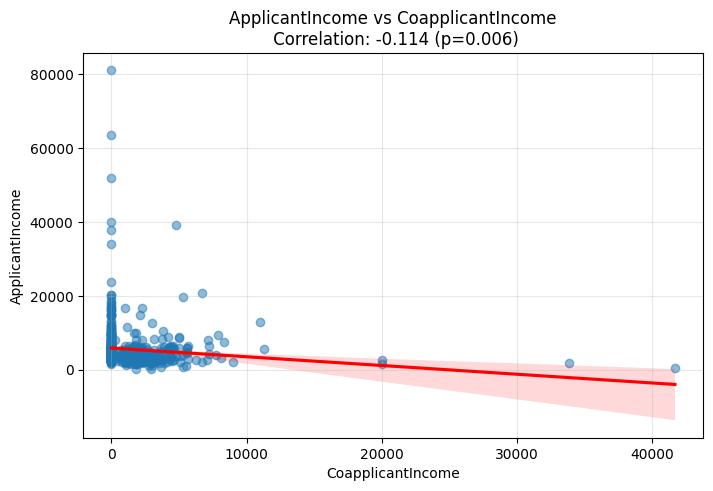

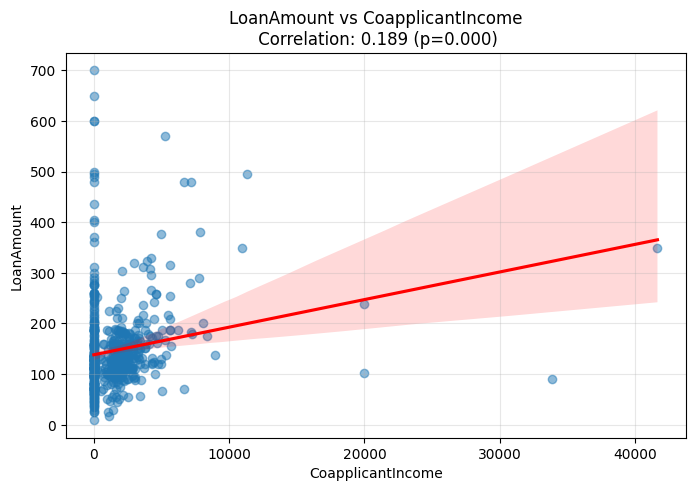

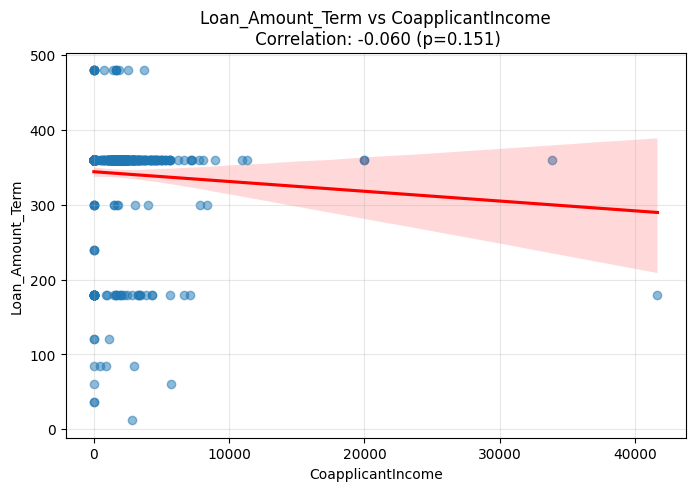

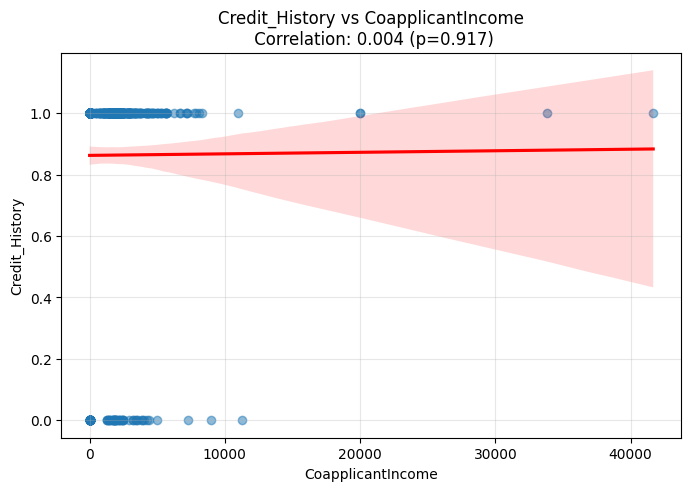

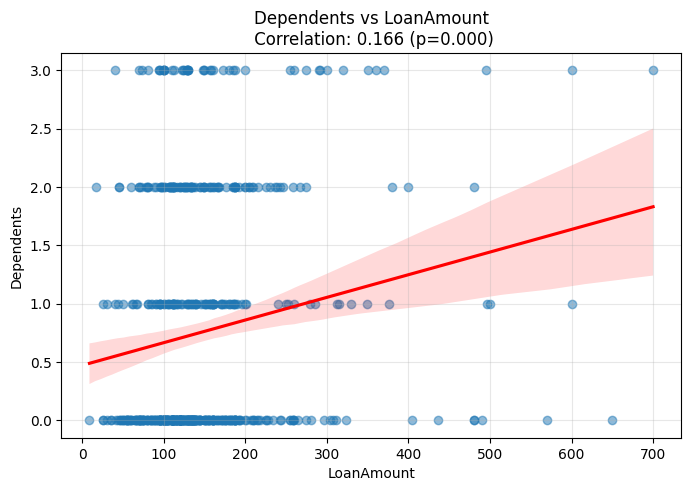

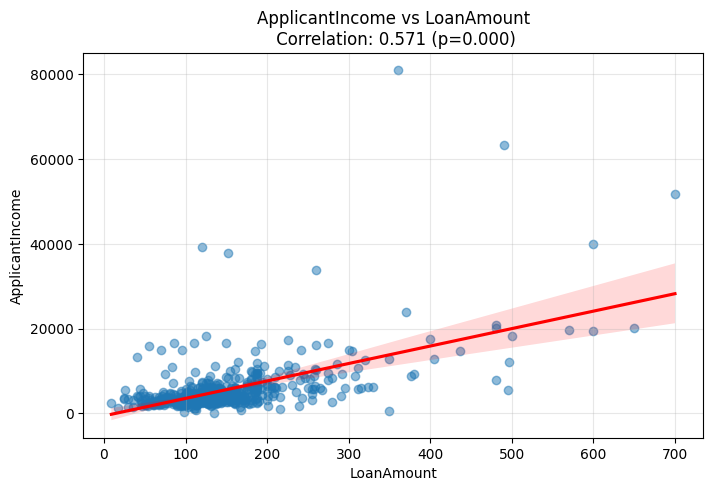

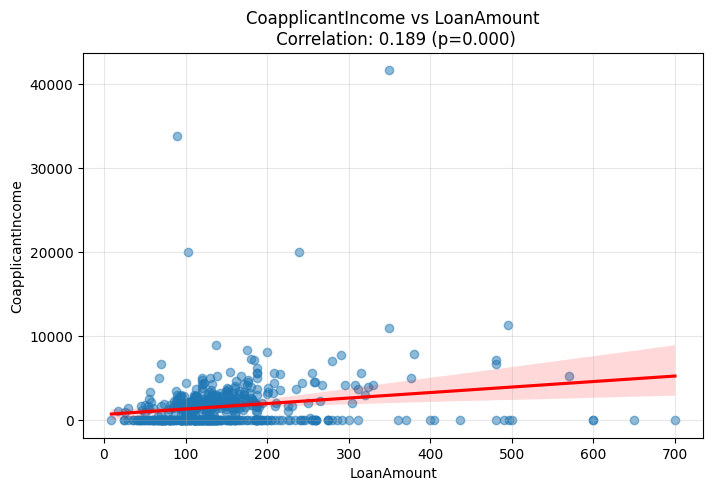

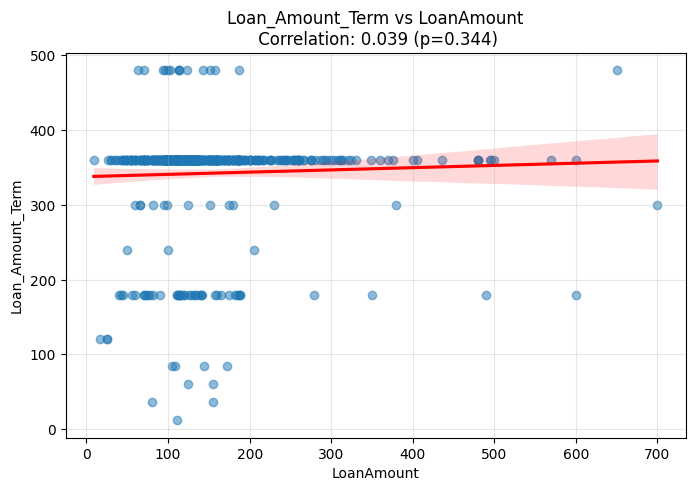

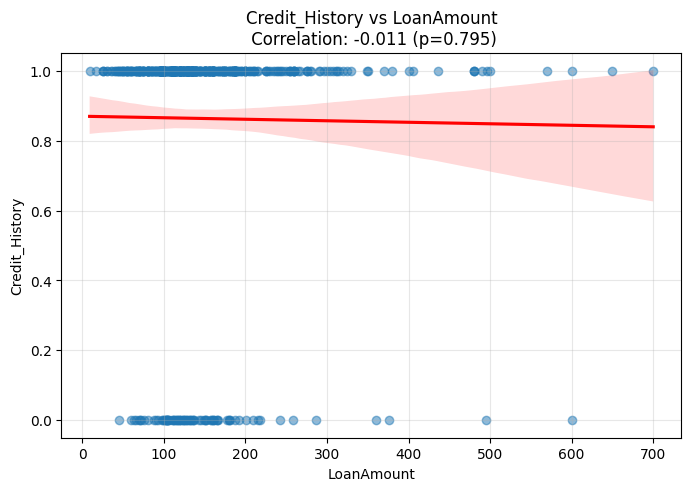

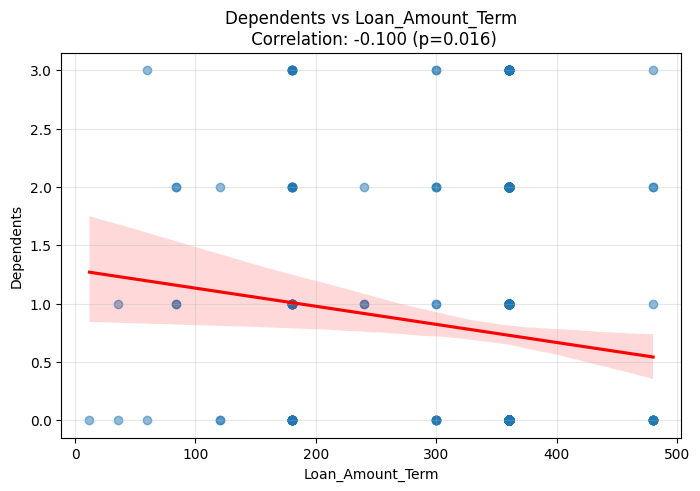

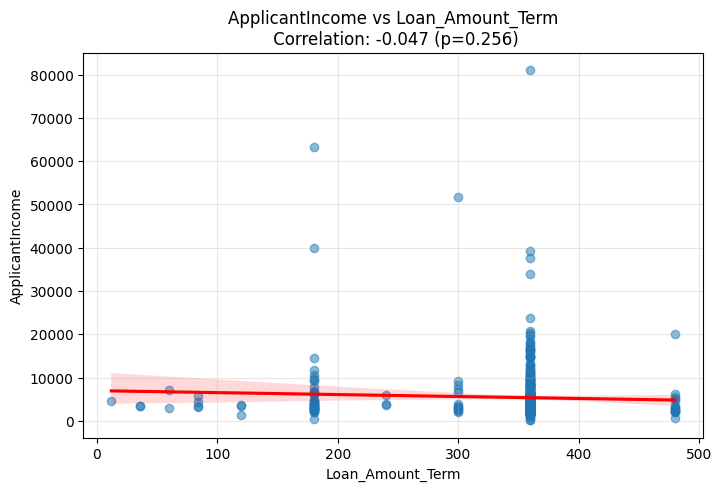

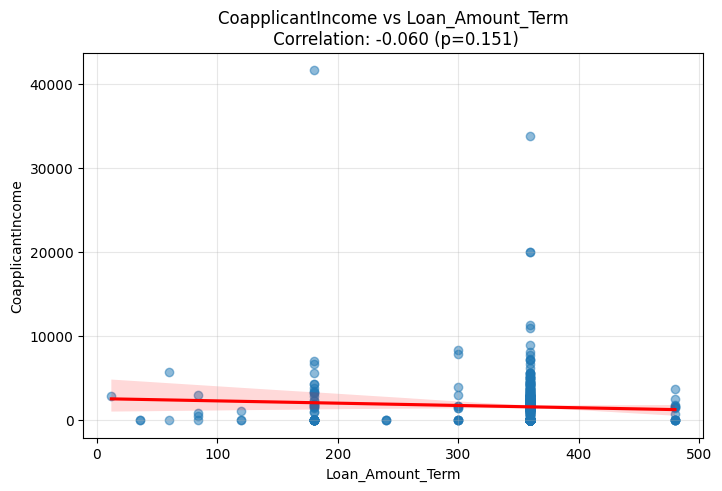

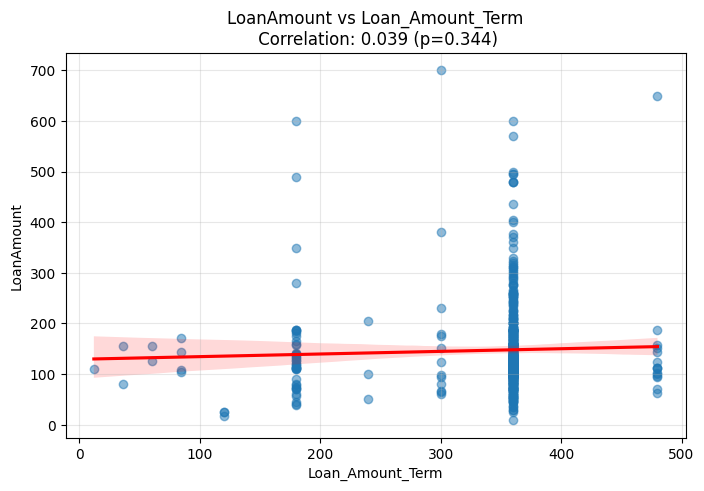

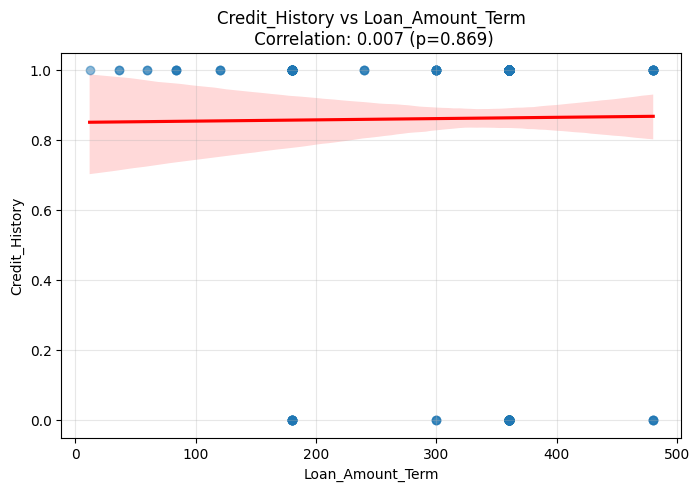

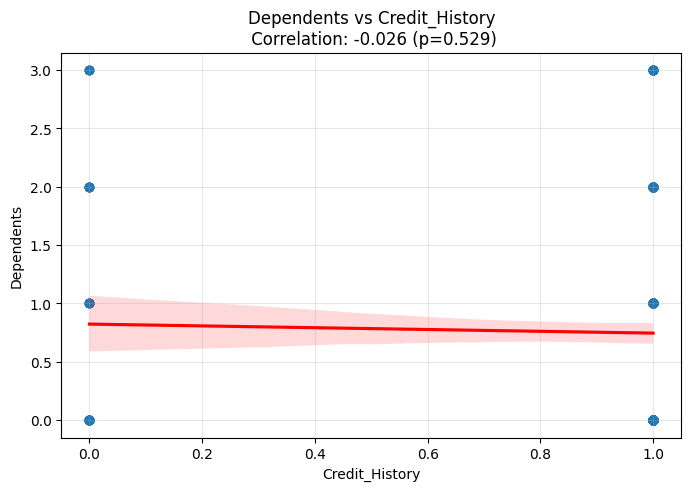

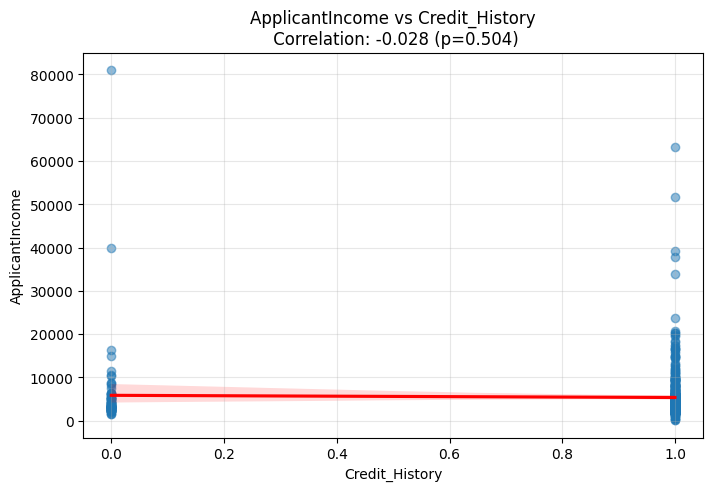

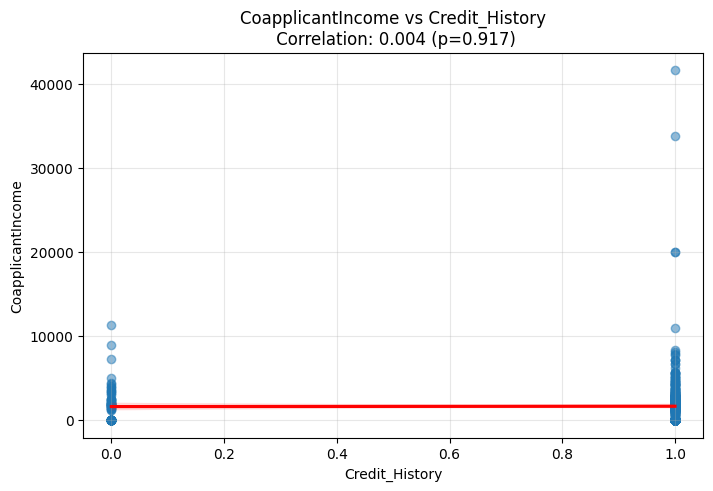

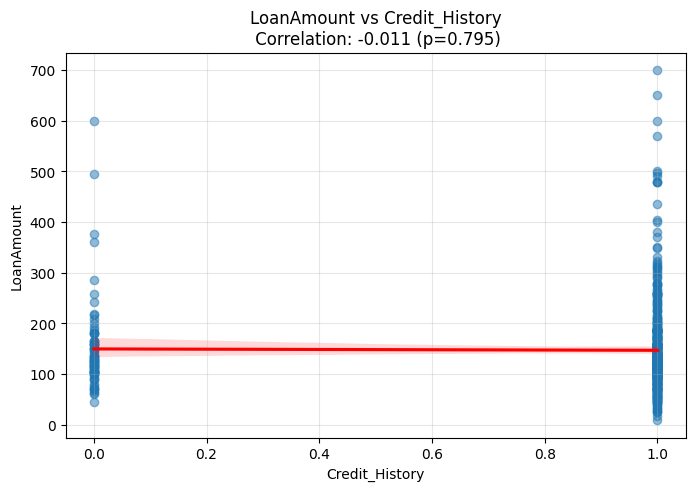

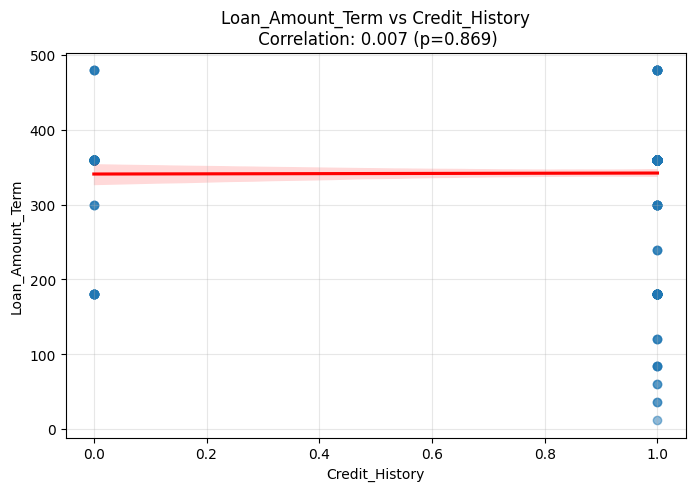

In [269]:
for col in num_cols:
    for col2 in num_cols:
        if col != col2:
            numeric_bivariate_plot(data, col, col2)

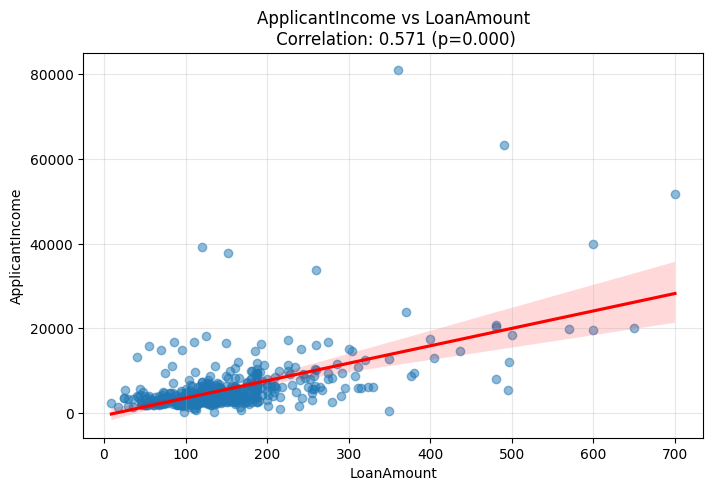

In [268]:
numeric_bivariate_plot(data, "LoanAmount", "ApplicantIncome")

                                                                                             |
| Feature                  | Correlation | Interpretation                                                                                      |
| ------------------------ | ----------- | --------------------------------------------------------------------------------------------------- |
| **Dependents vs Applicants Income**              | +0.126       | Strong positive — more dependents → higher applicant income.             |
| **Applicant Income vs Loan Amount**     | +0.571       | Strong positive  |higher loan amount → higher applicant income.             |
| **Dependents vs Loan Amount**            | +0.166      | Moderate positive — contributes to stability and aroma. Helpful but secondary predictor.            |
| **Dependents vs Loan Amount Term**          | -0.100       | Slightly negative — more dependents → longer loan amount term|


In [270]:
df.to_csv('cleaned_eda_data.csv', index=False)

#### **Task 2.2**: Univariate Numerical EDA